In [48]:
#Imports
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import numpy as np
from pandas.api.types import is_string_dtype
import os
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler,Normalizer,FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,HuberRegressor,Lasso,BayesianRidge,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import warnings
from sklearn.svm import SVR
import statsmodels.api as sm

In [2]:
#view all rows and columns
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', 199)  # or 199

In [3]:
dfc=pd.read_csv('Energy_data_1.csv')  

/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1192/3480755621.py:1: DtypeWarning: Columns (3,4,6,7,10,11,12,13,14,15,17,19,22,26,30,31,32,33,68,69,98,99,100,101,122,149,163,195,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,229,230,231,232,233,234,235,236,237,243,251,252,253,254,255,256,257,259,261,264,265,266,289,290,316,317,318,319,339,340,347,348,349,366,380,409,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,440,441,442,443,444,445,460,461,472,474,476,478,481,482,483,484,485,486,492,506,507,508,525,528,529,532,533,535,548) have mixed types. Specify dtype option on import or set low_memory=False.
  dfc=pd.read_csv('Energy_data_1.csv')


In [6]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175784 entries, 0 to 175783
Columns: 557 entries, Unnamed: 0 to retail_store_weekly_operating
dtypes: float64(416), int64(4), object(137)
memory usage: 747.0+ MB


In [ ]:
#From kaggle
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(dfc)

Your selected dataframe has 556 columns.
There are 548 columns that have missing values.


,Missing Values,% of Total Values
water_wastewater_investment,175784,100.0
race_track_gross_floor_area,175784,100.0
difference_from_national_3,175784,100.0
barracks_gross_floor_area_ft,175784,100.0
water_wastewater_estimated,175784,100.0
...,...,...
community_board,7204,4.1
borough,7158,4.1
metered_areas_energy,5611,3.2
number_of_buildings,40,0.0


In [4]:
# Delete columns containing either 50% or more than 50% NaN Values
perc = 50.0
min_count =  int(((100-perc)/100)*dfc.shape[0] + 1)
dfc_reduced = dfc.dropna( axis=1, thresh=min_count)

In [7]:
dfc_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175784 entries, 0 to 175783
Data columns (total 88 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       175784 non-null  int64  
 1   property_id                      175784 non-null  int64  
 2   property_name                    175784 non-null  object 
 3   parent_property_id               143078 non-null  object 
 4   parent_property_name             143078 non-null  object 
 5   year_ending                      175784 non-null  object 
 6   address_1                        175664 non-null  object 
 7   city                             175746 non-null  object 
 8   postcode                         175784 non-null  object 
 9   largest_property_use_type        149521 non-null  object 
 10  year_built                       175784 non-null  int64  
 11  number_of_buildings              175744 non-null  float64
 12  oc

In [5]:
dfc_reduced.to_csv('Energy_data_reduced.csv')

In [4]:
dfc_reduced=pd.read_csv('Energy_data_reduced.csv') 

FileNotFoundError: ignored

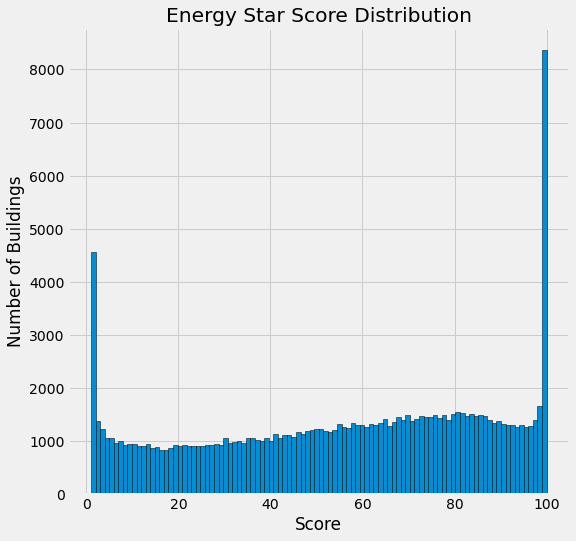

In [6]:
figsize(8, 8)
# Rename the score 
data = dfc_reduced.rename(columns = {'energy_star_score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

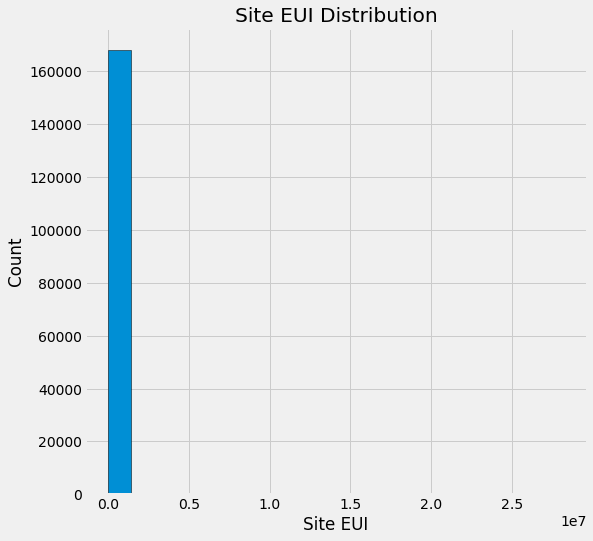

In [12]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['site_eui_kbtu_ft'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [7]:
# Calculate first and third quartile
first_quartile = data['site_eui_kbtu_ft'].describe()['25%']
third_quartile = data['site_eui_kbtu_ft'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['site_eui_kbtu_ft'] > (first_quartile - 3 * iqr)) &
            (data['site_eui_kbtu_ft'] < (third_quartile + 3 * iqr))]


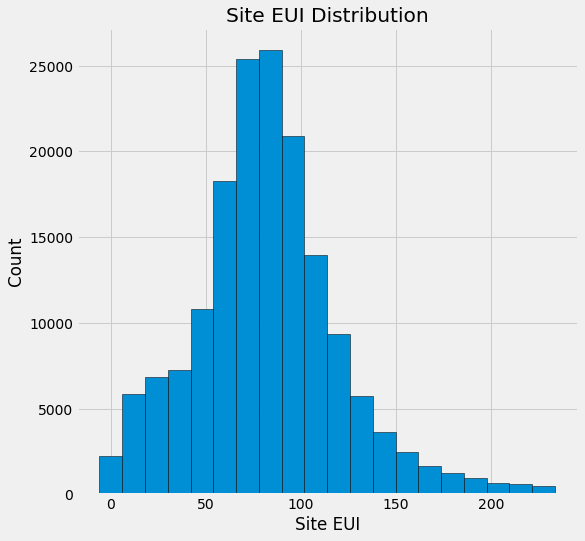

In [14]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['site_eui_kbtu_ft'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [11]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['largest_property_use_type'].value_counts()
types = list(types[types.values > 100].index)

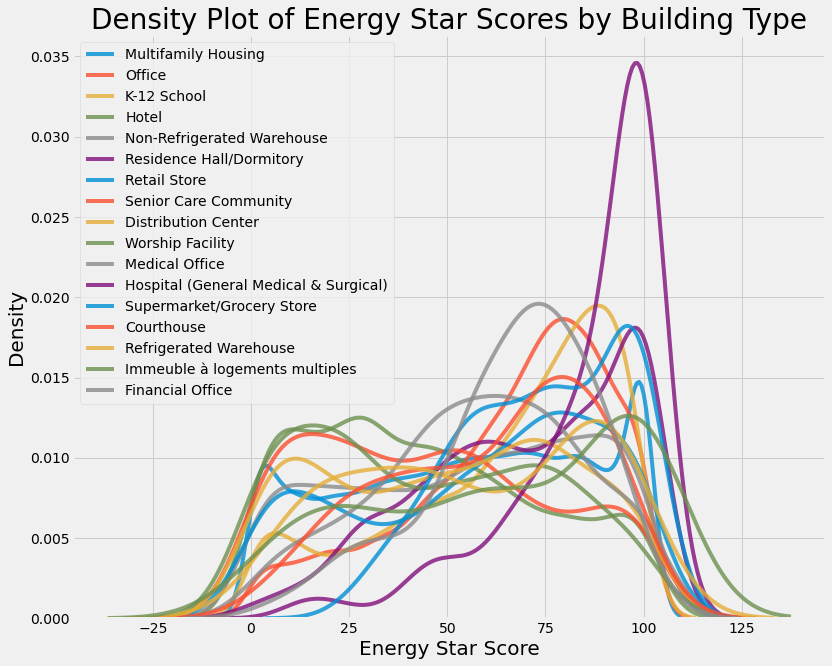

In [16]:
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['largest_property_use_type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);
plt.legend()

In [8]:
#property type dictionary
property_type = {'Multifamily Housing':'Multifamily Housing',  
            'Residence Hall/Dormitory':'Residence Hall/Dormitory',
            'Other - Lodging/Residential':'Residence Hall/Dormitory',
            'Hotel':'Hotel',
            'Adult Education':'College/University',
            'College/University':'College/University',
            'K-12 School':'College/University',
            'Library':'College/University',
            'Vocational School':'College/University',
            'Other - Education':'College/University',
            'Office':'Office',
            'Medical Office':'Office',
            'Financial Office':'Office',
            'Bank Branch':'Office',
            'Distribution Center':'Distribution Center',
            'Self-Storage Facility':'Distribution Center',
            'Wholesale Club/Supercenter':'Distribution Center',
            'Non-Refrigerated Warehouse':'Distribution Center',
            'Fast Food Restaurant':'Food Service',
            'Food Sales':'Food Service',
            'Food Service':'Food Service',
            'Restaurant':'Food Service',
                 'Supermarket/Grocery Store':'Food Service',
            'Convenience Store without Gas Station':'Food Service',
            'Other - Restaurant/Bar':'Food Service',
            'Hospital (General Medical & Surgical)':'Senior Care Community',
            'Urgent Care/Clinic/Other Outpatient':'Senior Care Community',
            'Ambulatory Surgical Center':'Senior Care Community',
            'Laboratory':'Senior Care Community',
            'Pre-school/Daycare':'Senior Care Community',
            'Senior Care Community':'Senior Care Community',
            'Outpatient Rehabilitation/Physical Therapy':'Senior Care Community',
            'Retail Store':'Retail Store',
            'Repair Services (Vehicle, Shoe, Locksmith, etc.)':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Automobile Dealership':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Personal Services (Health/Beauty, Dry Cleaning...':'Retail Store',
            'Enclosed Mall':'Retail Store',
            'Other - Mall':'Retail Store',
            'Other - Services':'Retail Store',
            'Other - Utility':'Retail Store',
            'Bar/Nightclub':'Recreation',
            'Bowling Alley':'Recreation',
                 'Fitness Center/Health Club/Gym':'Recreation',
            'Other - Recreation':'Recreation',
            'Other - Entertainment/Public Assembly':'Recreation',
            'Performing Arts':'Recreation',
            'Social/Meeting Hall':'Recreation',
            'Museum':'Recreation',
            'Worship Facility':'Recreation',
            'Other':'Other',
            'Courthouse':'Other',
            'Other - Public Services':'Other',
            'Swimming Pool':'Other',
            'Parking':'Other',
            'Refrigerated Warehouse':'Other',
            'Data Center':'Other',
            'none':'none'
              }

In [9]:
#fit to dicitonary
data['largest_property_use_type'] = data['largest_property_use_type'].map(property_type).astype(str)


In [10]:
# Create a list of buildings with more than 100 measurements
types_1 = data.dropna(subset=['score'])
types_1 = types_1['largest_property_use_type'].value_counts()
types_1 = list(types_1[types_1.values > 100].index)

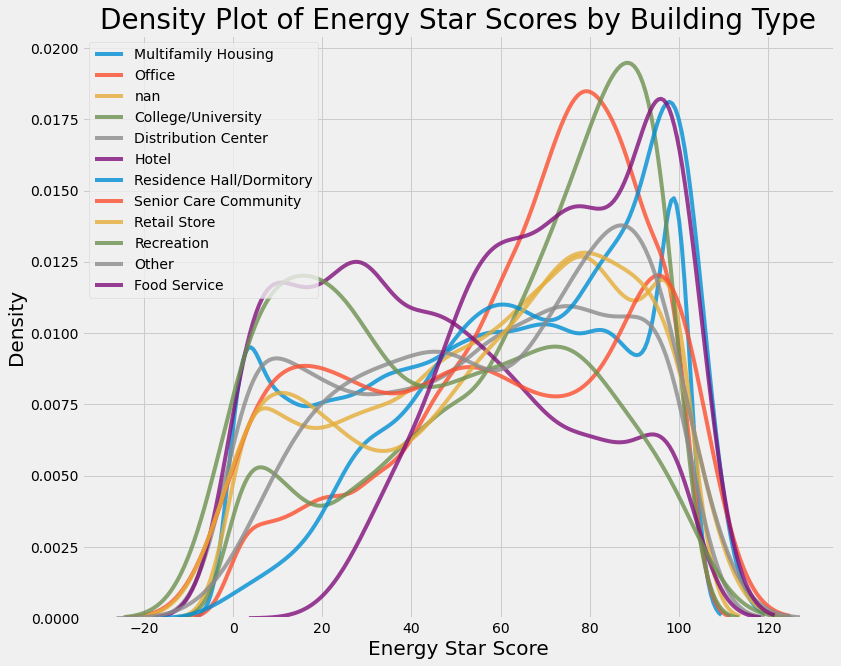

In [20]:
figsize(12, 10)

# Plot each building
for b_type in types_1:
    # Select the building type
    subset = data[data['largest_property_use_type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);
plt.legend()

# Find ing model by property type

In [56]:
prop_type=data.groupby(['largest_property_use_type']).count()

In [57]:
prop_type

,Unnamed: 0,property_id,property_name,parent_property_id,parent_property_name,year_ending,address_1,city,postcode,year_built,number_of_buildings,occupancy,metered_areas_energy,score,site_eui_kbtu_ft,site_energy_use_kbtu,source_eui_kbtu_ft,source_energy_use_kbtu,natural_gas_use_kbtu,green_power_offsite_kwh,estimated_values_energy,estimated_values_water,alert_energy_meter_has_gaps,alert_property_has_no_uses,default_values,temporary_values,last_modified_date_property,last_modified_date_gas_meters,generation_date,release_date,borough,community_board,council_district,census_tract,nta,longitude,latitude,nyc_borough_block_and_lot,nyc_building_identification,primary_property_type_self,primary_property_type,national_median_reference,list_of_all_property_use,largest_property_use_type_1,energy_star_certification_2,weather_normalized_site_eui,national_median_site_eui,difference_from_national,weather_normalized_site_energy,weather_normalized_site,weather_normalized_site_1,weather_normalized_source,national_median_source_eui,difference_from_national_1,weather_normalized_source_1,weather_normalized_site_2,electricity_use_grid_purchase,electricity_use_grid_purchase_1,weather_normalized_site_3,total_ghg_emissions_metric,direct_ghg_emissions_metric,indirect_ghg_emissions_metric,net_emissions_metric_tons,national_median_total_ghg,egrid_output_emissions_rate,avoided_emissions_offsite,percent_of_electricity_that,multifamily_housing_gross,multifamily_housing_number,multifamily_housing_number_4,multifamily_housing_total,multifamily_housing_total_1,multifamily_housing_number_5,multifamily_housing_number_6,multifamily_housing_number_7,estimated_data_flag,estimated_data_flag_natural,alert_data_center_issue_with,alert_gross_floor_area_is,alert_energy_meter_has_less,alert_energy_meter_has,alert_energy_no_meters,alert_energy_meter_has_single,property_gfa_self_reported,property_gfa_calculated,property_gfa_calculated_1,data_quality_checker_run
largest_property_use_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
College/University,11872,11872,11872,9768,9768,11872,11872,11872,11872,11872,11872,11872,11515,9194,11872,11872,11872,11872,11095,11762,11872,11872,8327,11872,11872,11872,8319,7712,11872,9342,11539,11539,11539,11539,11539,11539,11539,9886,9823,9932,8185,9932,9932,9932,9915,9510,9932,9932,9510,9762,9211,9510,9932,9932,9510,9211,9832,9832,9762,9930,9929,9928,9932,9879,9928,9834,9773,31,31,31,31,31,31,31,31,9846,9338,6387,9932,6387,6387,6387,6387,9932,8185,8185,7866
Distribution Center,4196,4196,4196,3311,3311,4196,4196,4196,4196,4196,4196,4196,4111,2599,4196,4196,4196,4196,3597,4153,4196,4196,3251,4196,4196,4196,3246,2828,4196,3296,4012,4011,4011,4011,4011,4011,4011,3288,3244,3344,2863,3344,3344,3344,3328,2973,3344,3344,2973,3132,2608,2973,3344,3344,2973,2608,3309,3310,3132,3344,3337,3339,3344,3326,3341,3315,3284,1,1,1,1,1,1,1,1,3333,2895,2399,3344,2399,2399,2399,2399,3344,2863,2863,2543
Food Service,344,344,344,262,262,344,344,344,344,344,344,344,322,198,344,344,344,344,310,340,344,344,288,344,344,344,288,258,344,262,322,322,322,322,322,322,322,262,259,267,243,267,267,267,267,248,267,267,248,256,230,248,267,267,248,230,264,264,256,267,267,267,267,267,266,264,264,0,0,0,0,0,0,0,0,265,243,211,267,211,211,211,211,266,243,243,198
Hotel,2569,2569,2569,2082,2082,2569,2569,2569,2569,2569,2569,2569,2549,2471,2569,2569,2569,2569,2416,2561,2569,2569,1978,2569,2569,2569,1977,1873,2569,2081,2479,2476,2476,2476,2476,2476,2476,1994,1879,2022,1728,2022,2022,2022,1992,1866,2022,2022,1866,1959,1804,1866,2022,2022,1866,1804,2015,2015,1959,2018,2009,2016,2022,2016,2018,2017,2013,34,34,34,34,34,34,34,34,2017,1905,1431,2022,1431,1431,1431,1431,2022,1728,1728,1492
Multifamily Housing,95418,95418,95418,74451,74451,95418,95418,95418,95418,95418,95418,95418,93552,85651,95418,95418,95418,95418,90317,94390,95418,95418,75623,95418,95418,95418,75554,72126,95418,73933,92355,92350,92350,92350,92350,92350,92350,76732,76353,77160,67316,77160

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


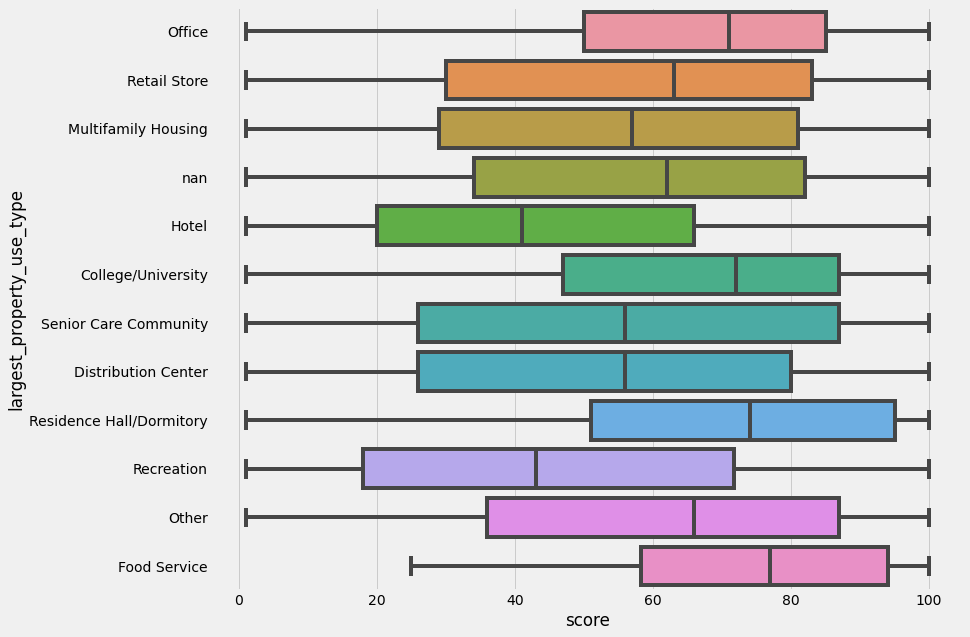

In [21]:
sns.boxplot(data['score'],data['largest_property_use_type'])

In [11]:
#remove variables that will not help with predicting

data.drop(['property_id','community_board', 'longitude', 'latitude','national_median_site_eui','council_district',
 'census_tract','national_median_source_eui','year_built','number_of_buildings','occupancy', 'Unnamed: 0',
 'property_name','parent_property_id','parent_property_name','address_1','city','postcode','nyc_borough_block_and_lot',
 'nyc_building_identification'], axis=1, inplace=True)


In [12]:
data.to_csv('Final_Clean_EDNYC.csv')

In [13]:
multifam=data[data['largest_property_use_type']=='Multifamily Housing']
college=data[data['largest_property_use_type']=='College/University']
office=data[data['largest_property_use_type']=='Office']
d_center=data[data['largest_property_use_type']=='Distribution Center']
hotel=data[data['largest_property_use_type']=='Hotel']
other=data[data['largest_property_use_type']=='Other']
rec=data[data['largest_property_use_type']=='Recreation']
dorm=data[data['largest_property_use_type']=='Residence Hall/Dormitory']
sen_care=data[data['largest_property_use_type']=='Senior Care Community']
retail=data[data['largest_property_use_type']=='Retail Store']

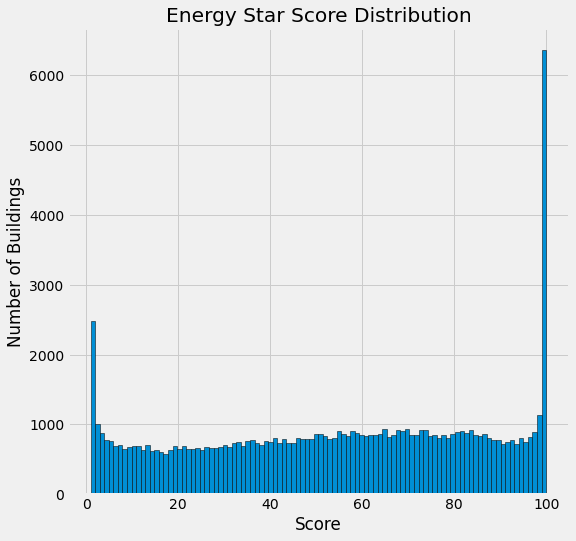

In [26]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(multifam['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

In [61]:
# Find all correlations and sort 
correlations_data = multifam.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

difference_from_national_1      -0.899490
difference_from_national        -0.899490
source_eui_kbtu_ft              -0.837439
weather_normalized_source       -0.836180
site_eui_kbtu_ft                -0.790127
weather_normalized_site_eui     -0.781156
weather_normalized_site         -0.481851
weather_normalized_site_1       -0.424858
electricity_use_grid_purchase   -0.154357
weather_normalized_site_3       -0.154036
indirect_ghg_emissions_metric   -0.133356
weather_normalized_source_1     -0.128061
source_energy_use_kbtu          -0.122456
total_ghg_emissions_metric      -0.116647
net_emissions_metric_tons       -0.116638
Name: score, dtype: float64 

multifamily_housing_total      -0.012042
property_gfa_self_reported     -0.009665
multifamily_housing_gross      -0.007206
largest_property_use_type_1    -0.007206
national_median_total_ghg      -0.006483
property_gfa_calculated        -0.000790
avoided_emissions_offsite      -0.000715
property_gfa_calculated_1       0.000373
green_power_

In [62]:
#identify and drop highly correlated variable
correlated_features = set()
correlation_matrix = multifam.drop('score',axis=1).corr()
threshold = 0.80

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [63]:
correlated_features

{'difference_from_national',
 'difference_from_national_1',
 'direct_ghg_emissions_metric',
 'electricity_use_grid_purchase_1',
 'indirect_ghg_emissions_metric',
 'largest_property_use_type_1',
 'multifamily_housing_gross',
 'multifamily_housing_number',
 'multifamily_housing_number_4',
 'national_median_total_ghg',
 'natural_gas_use_kbtu',
 'net_emissions_metric_tons',
 'property_gfa_calculated',
 'property_gfa_calculated_1',
 'property_gfa_self_reported',
 'source_energy_use_kbtu',
 'source_eui_kbtu_ft',
 'total_ghg_emissions_metric',
 'weather_normalized_site_2',
 'weather_normalized_site_3',
 'weather_normalized_site_energy',
 'weather_normalized_site_eui',
 'weather_normalized_source',
 'weather_normalized_source_1'}

In [64]:
multifam.drop(correlated_features,axis=1, inplace=True) 
multifam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95418 entries, 48 to 149598
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year_ending                    95418 non-null  object 
 1   largest_property_use_type      95418 non-null  object 
 2   metered_areas_energy           93552 non-null  object 
 3   score                          85651 non-null  float64
 4   site_eui_kbtu_ft               95418 non-null  float64
 5   site_energy_use_kbtu           95418 non-null  float64
 6   green_power_offsite_kwh        94390 non-null  float64
 7   estimated_values_energy        95418 non-null  object 
 8   estimated_values_water         95418 non-null  object 
 9   alert_energy_meter_has_gaps    75623 non-null  object 
 10  alert_property_has_no_uses     95418 non-null  object 
 11  default_values                 95418 non-null  object 
 12  temporary_values               95418 non-nul

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
# Select the numeric columns
numeric_subset = multifam.select_dtypes('number')

# # Create columns with square root and log of numeric columns
# for col in numeric_subset.columns:
#     # Skip the Energy Star Score column
#     if col == 'score':
#         next
#     else:
#         numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
#         numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = multifam[['borough']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

In [106]:
# Print the most negative correlations
print(correlations.head(5), '\n')

# Print the most positive correlations
print(correlations.tail(5))

difference_from_national_1   -0.899490
difference_from_national     -0.899490
source_eui_kbtu_ft           -0.837439
weather_normalized_source    -0.836180
site_eui_kbtu_ft             -0.790127
Name: score, dtype: float64 

borough_QUEENS                  0.041290
borough_BROOKLYN                0.076964
multifamily_housing_number_6    0.100560
multifamily_housing_number_7    0.136792
score                           1.000000
Name: score, dtype: float64


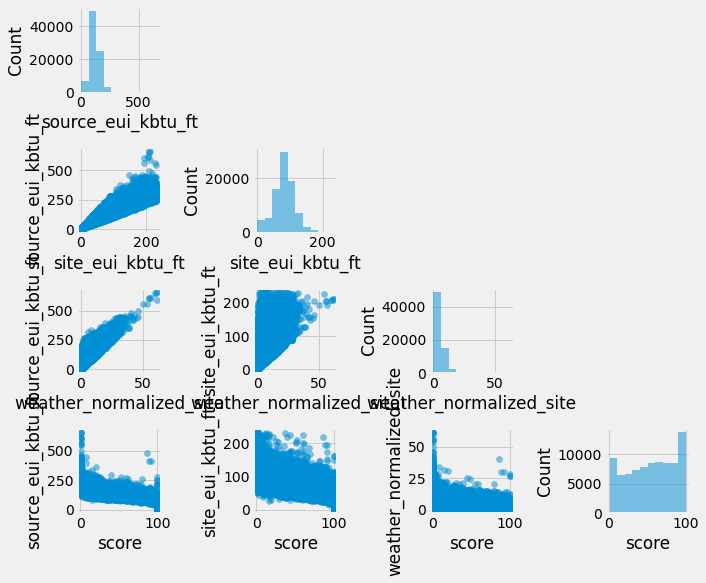

In [ ]:
cols=['source_eui_kbtu_ft','site_eui_kbtu_ft','weather_normalized_site','score']

import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(features[cols].values, figsize=(10, 8), 
                  names=cols, alpha=0.5)
plt.tight_layout()
#plt.savefig('images/10_03.png', dpi=300)
plt.show()


In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85651 entries, 48 to 149598
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   score                            85651 non-null  float64
 1   site_eui_kbtu_ft                 85651 non-null  float64
 2   site_energy_use_kbtu             85651 non-null  float64
 3   source_eui_kbtu_ft               85651 non-null  float64
 4   source_energy_use_kbtu           85651 non-null  float64
 5   natural_gas_use_kbtu             81351 non-null  float64
 6   green_power_offsite_kwh          84742 non-null  float64
 7   largest_property_use_type_1      68768 non-null  float64
 8   weather_normalized_site_eui      62212 non-null  float64
 9   difference_from_national         68768 non-null  float64
 10  weather_normalized_site_energy   62212 non-null  float64
 11  weather_normalized_site          66743 non-null  float64
 12  weather_normaliz

In [16]:
# fill in nan with mean
for i in features.columns:
    mean_value=features[i].mean()
    features[i].fillna(value=mean_value, inplace=True)

In [17]:
sc=StandardScaler()
standard=features.copy()
sub=standard.select_dtypes(include=[np.number])
standard[sub.columns[1:51]]=sc.fit_transform(standard[sub.columns[1:51]])
standard.head()

,score,site_eui_kbtu_ft,site_energy_use_kbtu,source_eui_kbtu_ft,source_energy_use_kbtu,natural_gas_use_kbtu,green_power_offsite_kwh,largest_property_use_type_1,weather_normalized_site_eui,difference_from_national,...,multifamily_housing_number_6,multifamily_housing_number_7,property_gfa_self_reported,property_gfa_calculated,property_gfa_calculated_1,borough_BRONX,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN IS
48,75.0,-1.146811,0.757139,-0.138632,1.853301,-0.210778,-0.006275,5.871701e-17,-2.608427e-14,2.986518e-16,...,-4.070083e-16,-1.458745e-15,0.0,-5.947607e-17,0.0,-0.537887,-0.568438,1.409853,-0.428807,-0.094995
70,68.0,-0.127552,1.892033,0.055843,2.460704,1.514698,-0.006275,5.871701e-17,-2.608427e-14,2.986518e-16,...,-4.070083e-16,-1.458745e-15,0.0,-5.947607e-17,0.0,-0.537887,-0.568438,1.409853,-0.428807,-0.094995
1088,70.0,-0.483246,1.163875,-0.004511,1.807899,-0.188161,-0.006275,5.871701e-17,-2.608427e-14,2.986518e-16,...,-4.070083e-16,-1.458745e-15,0.0,-5.947607e-17,0.0,-0.537887,-0.568438,-0.709294,-0.428807,-0.094995
1095,15.0,0.661552,1.206991,0.961157,1.565835,0.980575,-0.006275,5.871701e-17,-2.608427e-14,2.986518e-16,...,-4.070083e-16,-1.458745e-15,0.0,-5.947607e-17,0.0,-0.537887,-0.568438,1.409853,-0.428807,-0.094995
1096,14.0,0.670520,0.691988,0.764447,0.833751,0.625417,-0.006275,5.871701e-17,-2.608427e-14,2.986518e-16,...,-4.070083e-16,-1.458745e-15,0.0,-5.947607e-17,0.0,-0.537887,-0.568438,-0.709294,-0.428807,-0.094995


In [18]:
sc=Normalizer()
normalized=features.copy()
sub=normalized.select_dtypes(include=[np.number])
normalized[sub.columns[1:51]]=sc.fit_transform(standard[sub.columns[1:51]])
normalized.head()

,score,site_eui_kbtu_ft,site_energy_use_kbtu,source_eui_kbtu_ft,source_energy_use_kbtu,natural_gas_use_kbtu,green_power_offsite_kwh,largest_property_use_type_1,weather_normalized_site_eui,difference_from_national,...,multifamily_housing_number_6,multifamily_housing_number_7,property_gfa_self_reported,property_gfa_calculated,property_gfa_calculated_1,borough_BRONX,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN IS
48,75.0,-0.400976,0.264729,-0.048472,0.647996,-0.073697,-0.002194,2.053008e-17,-9.120221e-15,1.044220e-16,...,-1.423082e-16,-5.100421e-16,0.0,-2.079548e-17,0.0,-0.188069,-0.198751,0.492947,-0.149930,-0.033214
70,68.0,-0.033221,0.492783,0.014544,0.640895,0.394506,-0.001634,1.529295e-17,-6.793695e-15,7.778440e-17,...,-1.060060e-16,-3.799327e-16,0.0,-1.549065e-17,0.0,-0.140094,-0.148051,0.367199,-0.111683,-0.024742
1088,70.0,-0.194068,0.467403,-0.001812,0.726038,-0.075564,-0.002520,2.358030e-17,-1.047524e-14,1.199362e-16,...,-1.634514e-16,-5.858206e-16,0.0,-2.388513e-17,0.0,-0.216011,-0.228280,-0.284847,-0.172205,-0.038149
1095,15.0,0.220215,0.401779,0.319946,0.521229,0.326410,-0.002089,1.954549e-17,-8.682833e-15,9.941407e-17,...,-1.354834e-16,-4.855814e-16,0.0,-1.979817e-17,0.0,-0.179050,-0.189220,0.469307,-0.142740,-0.031621
1096,14.0,0.339201,0.350061,0.386717,0.421776,0.316384,-0.003174,2.970362e-17,-1.319545e-14,1.510813e-16,...,-2.058964e-16,-7.379463e-16,0.0,-3.008761e-17,0.0,-0.272105,-0.287560,-0.358816,-0.216924,-0.048056


In [19]:
X=features.drop('score', axis=1)
y=features['score']
X_n=normalized.drop('score', axis=1)
y_n=normalized['score']
X_r=standard.drop('score', axis=1)
y_r=standard['score']

In [20]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(54816, 43)
(13704, 43)
(17131, 43)
(54816,)
(13704,)
(17131,)


In [21]:
# Split into 80% training and 20% testing set
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size = 0.2, random_state = 42)
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_train_r, y_train_r, test_size=0.20, random_state=1)


In [22]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train['site_eui_kbtu_ft'])
results = model.fit()
y_test_pred=results.predict(y_test)
y_train_pred=results.predict(y_train)
mse=mean_squared_error(y_test, y_test_pred)
print('MSE base: %.3f' % mse)
print(results.summary())

MSE base: 1130.534
                                 OLS Regression Results                                
Dep. Variable:                  score   R-squared (uncentered):                   0.442
Model:                            OLS   Adj. R-squared (uncentered):              0.442
Method:                 Least Squares   F-statistic:                          4.349e+04
Date:                Thu, 14 Jul 2022   Prob (F-statistic):                        0.00
Time:                        07:38:47   Log-Likelihood:                     -2.8872e+05
No. Observations:               54816   AIC:                                  5.774e+05
Df Residuals:                   54815   BIC:                                  5.775e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [23]:
# Split into 80% training and 20% testing set
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size = 0.2, random_state = 42)
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(X_train_n, y_train_n, test_size=0.20, random_state=1)


In [24]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 57.00
Baseline Performance on the test set: MAE = 26.3920


In [25]:
def dtree(X_train, X_val, y_train, y_val, X_test, y_test):
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor() 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))

In [26]:
dtree(X_train, X_val, y_train, y_val, X_test, y_test )

MSE train: 0.020, val: 65.202
R^2 train: 1.000, val: 0.931


In [27]:
dtree(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MSE train: 0.021, val: 64.550
R^2 train: 1.000, val: 0.931


In [28]:
dtree(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MSE train: 0.021, val: 65.464
R^2 train: 1.000, val: 0.930


In [29]:
def gbr(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg = GradientBoostingRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    

In [30]:
gbr(X_train, X_val, y_train, y_val, X_test, y_test )

MSE train: 35.434, val: 34.783
R^2 train: 0.963, val: 0.963


In [31]:
gbr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MSE train: 39.847, val: 40.090
R^2 train: 0.958, val: 0.957


In [32]:
gbr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MSE train: 35.434, val: 34.784
R^2 train: 0.963, val: 0.963


In [33]:
from sklearn.svm import SVR

In [34]:
def svr(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg = SVR()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    

In [35]:
svr(X_train, X_val, y_train, y_val, X_test, y_test )

MSE train: 855.587, val: 847.245
R^2 train: 0.097, val: 0.100


In [36]:
svr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MSE train: 40.921, val: 38.244
R^2 train: 0.957, val: 0.959


In [37]:
svr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MSE train: 62.657, val: 61.014
R^2 train: 0.934, val: 0.935


In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
def rf(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg = RandomForestRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))

In [40]:
rf(X_train, X_val, y_train, y_val, X_test, y_test )

MSE train: 4.941, val: 32.846
R^2 train: 0.995, val: 0.965


In [41]:
rf(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MSE train: 4.982, val: 33.492
R^2 train: 0.995, val: 0.964


In [42]:
rf(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MSE train: 4.966, val: 32.839
R^2 train: 0.995, val: 0.965


HYPERPARAMETER TUNING

In [44]:
from sklearn.metrics import make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)


In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
GBR = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}
GBR = DecisionTreeRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters ={'kernel': {'linear': {'C': [0, 100]},
                    'rbf': {'gamma': [0, 50], 'C': [1, 100]},
                    'poly': {'degree': [2, 5], 'C': [1000, 20000], 'coef0': [0, 1]}
                    }
         }
GBR = SVR()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [132]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

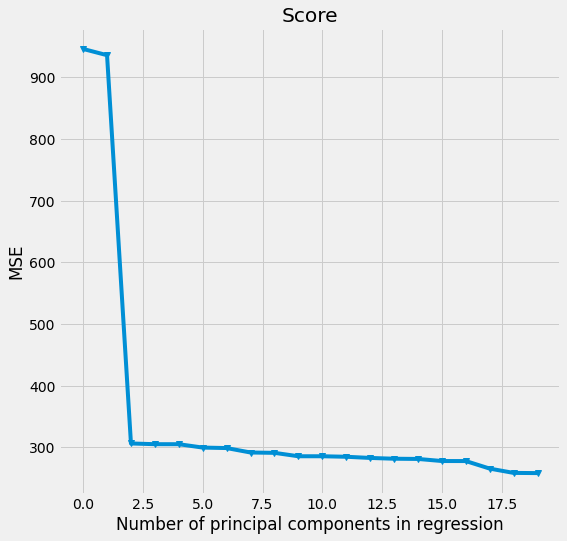

In [133]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [134]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 39.24,  52.74,  60.03,  65.41,  69.98,  73.16,  76.12,  78.89,
        81.39,  83.75,  86.07,  88.14,  89.8 ,  91.17,  92.41,  93.61,
        94.73,  95.72,  96.6 ,  97.23,  97.79,  98.21,  98.61,  99.  ,
        99.28,  99.47,  99.6 ,  99.7 ,  99.77,  99.83,  99.88,  99.92,
        99.95,  99.97,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  ])

In [47]:
pca = PCA(whiten=True)
pca.fit(features)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.88047804, 0.9739246 , 0.99659223, 0.99874318, 0.9993433 ,
       0.99976124, 0.99998041, 0.99999259, 0.99999738, 0.99999876,
       0.99999991, 0.99999996, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [50]:
pca = PCA(n_components=2,whiten=True)
pca = pca.fit(features)
dataPCA = pca.transform(features)

In [51]:
from sklearn.model_selection import KFold

In [52]:
# R2 Score

def lets_try(train,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2_val_score = -1*model_selection.cross_val_score(clf, train, labels, cv=cv,scoring='neg_mean_squared_error')
        scores=[r2_val_score.mean()]
        return scores

    clf = LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    clf = GradientBoostingRegressor()
    results["Gradient Boost"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["MSE"] 
    results=results.sort(columns=["MSE"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

lets_try(X_train,y_train)

/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.22679e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.44613e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.63779e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.0549e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Lucy/opt/anaconda3/lib/python3.9/s

KeyboardInterrupt: 

In [ ]:
# Split traing and test
train = dataPCA[:1460]
test = dataPCA[1460:]

lets_try(train,labels)

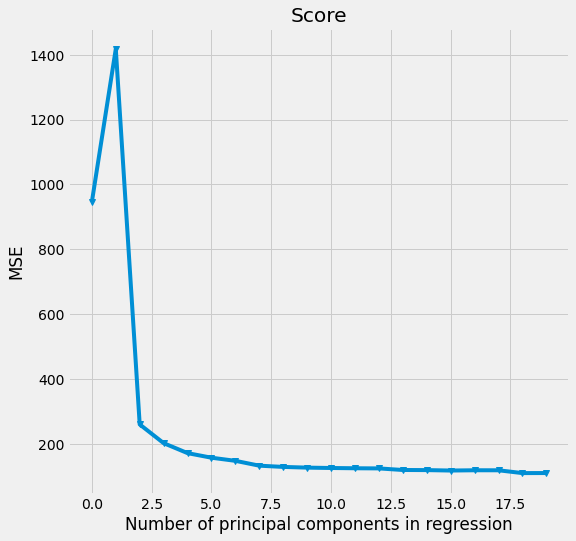

In [135]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = DecisionTreeRegressor()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [ ]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = GradientBoostingRegressor()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [ ]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = SVR()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [ ]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = RandomForestRegressor()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [ ]:
pca2 = PCA()



# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA()
pca.fit(X_train_sc)
# show the results
pca.components_
pca.explained_variance_
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_) 

array([0.14344059, 0.26250198, 0.36349586, 0.45633094, 0.54185459,
       0.61874203, 0.69175345, 0.75490083, 0.81694581, 0.86881166,
       0.90683268, 0.93350739, 0.958566  , 0.98259236, 0.99725608,
       1.        ])

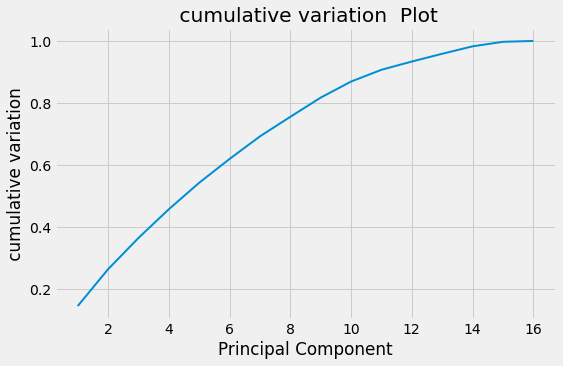

In [ ]:
# generate the Scree plot for PCs
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(16) + 1
plt.plot(sing_vals, np.cumsum(pca.explained_variance_ratio_), linewidth=2)
plt.title(' cumulative variation  Plot')
plt.xlabel('Principal Component')
plt.ylabel(' cumulative variation ')
plt.show()

In [ ]:
principal_Df = pd.DataFrame(data = X_train_pca
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principal_Df.tail()

,principal component 1,principal component 2
54811,0.869627,-0.284183
54812,-0.441225,-0.376926
54813,-1.191270,-0.313020
54814,-2.535587,1.336062
54815,-1.750850,0.154097


In [ ]:
print('Explained variation per principal component: {}'.format(explained_variance))

Explained variation per principal component: [0.14344059 0.1190606 ]


In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 1)                 2

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
history = NN_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/200
1370/1371 [============================>.] - ETA: 0s - loss: 348.6354 - mean_squared_error: 20217294.0000
Epoch 1: val_loss improved from inf to 154.93478, saving model to Weights-001--154.93478.hdf5
1371/1371 [==============================] - 43s 30ms/step - loss: 348.5920 - mean_squared_error: 20211774.0000 - val_loss: 154.9348 - val_mean_squared_error: 110179.7031
Epoch 2/200
1371/1371 [==============================] - ETA: 0s - loss: 54.9928 - mean_squared_error: 27641.3945
Epoch 2: val_loss improved from 154.93478 to 45.84657, saving model to Weights-002--45.84657.hdf5
1371/1371 [==============================] - 36s 26ms/step - loss: 54.9928 - mean_squared_error: 27641.3945 - val_loss: 45.8466 - val_mean_squared_error: 4763.8535
Epoch 3/200
1369/1371 [============================>.] - ETA: 0s - loss: 46.2291 - mean_squared_error: 8355.4492
Epoch 3: val_loss improved from 45.84657 to 43.50563, saving model to Weights-003--43.50563.hdf5
1371/1371 [====================

KeyboardInterrupt: 

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
weights_file = 'Weights-005--37.41953.hdf5'
NN_model.load_weights(weights_file)
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
predictions = NN_model.predict(X_test)
list(zip(y_test, predictions))

# Find model by borough

In [ ]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

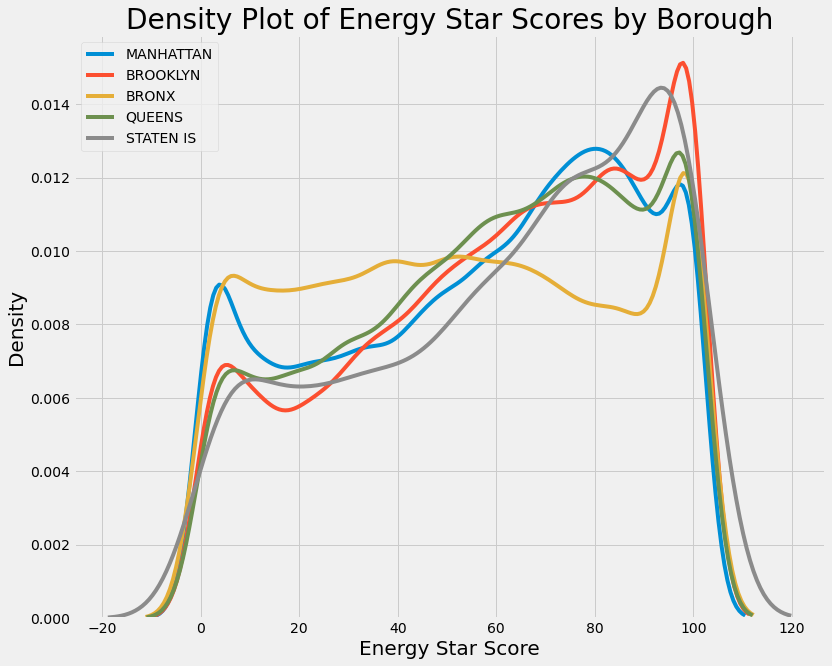

In [ ]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);
plt.legend()

In [ ]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

difference_from_national_1       -0.867565
difference_from_national         -0.867565
site_eui_kbtu_ft                 -0.744379
weather_normalized_site_eui      -0.737747
source_eui_kbtu_ft               -0.657722
weather_normalized_source        -0.655852
direct_ghg_emissions_metric      -0.086572
site_energy_use_kbtu             -0.083690
natural_gas_use_kbtu             -0.079277
net_emissions_metric_tons        -0.079162
total_ghg_emissions_metric       -0.079120
weather_normalized_site_energy   -0.078859
weather_normalized_site_2        -0.077353
latitude                         -0.071888
source_energy_use_kbtu           -0.071215
Name: score, dtype: float64 

percent_of_electricity_that     0.011597
weather_normalized_site_1       0.014754
property_gfa_self_reported      0.026841
largest_property_use_type_1     0.028841
property_gfa_calculated         0.032398
property_gfa_calculated_1       0.033528
egrid_output_emissions_rate     0.035328
community_board                 0.0433

In [ ]:
#identify and drop highly correlated variable
cor_matrix = data.drop('score',axis=1).corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]

<ipython-input-146-c3732233f365>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [ ]:
correlated_features = set()
correlation_matrix = data.drop('score',axis=1).corr()
threshold = 0.90

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
len(to_drop)

20

In [ ]:
print(correlated_features)

{'property_gfa_calculated_1', 'property_gfa_calculated', 'source_energy_use_kbtu', 'weather_normalized_source', 'net_emissions_metric_tons', 'weather_normalized_source_1', 'weather_normalized_site_eui', 'multifamily_housing_gross', 'electricity_use_grid_purchase', 'multifamily_housing_number', 'indirect_ghg_emissions_metric', 'national_median_total_ghg', 'weather_normalized_site_energy', 'multifamily_housing_number_7', 'property_gfa_self_reported', 'direct_ghg_emissions_metric', 'total_ghg_emissions_metric', 'weather_normalized_site_3', 'difference_from_national_1', 'weather_normalized_site_2'}


In [ ]:
to_drop

['source_energy_use_kbtu',
 'weather_normalized_site_eui',
 'weather_normalized_site_energy',
 'weather_normalized_source',
 'difference_from_national_1',
 'weather_normalized_source_1',
 'weather_normalized_site_2',
 'electricity_use_grid_purchase',
 'weather_normalized_site_3',
 'total_ghg_emissions_metric',
 'direct_ghg_emissions_metric',
 'indirect_ghg_emissions_metric',
 'net_emissions_metric_tons',
 'national_median_total_ghg',
 'multifamily_housing_gross',
 'multifamily_housing_number',
 'multifamily_housing_number_7',
 'property_gfa_self_reported',
 'property_gfa_calculated',
 'property_gfa_calculated_1']

In [ ]:
to_drop.remove('total_ghg_emissions_metric')
correlated_features.remove('total_ghg_emissions_metric')

In [ ]:
data_1=data.drop(correlated_features,axis=1) 

In [ ]:
28797 in data_1['property_id']

True

In [ ]:
# Select the numeric columns
numeric_subset = data_1.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data_1[['borough', 'largest_property_use_type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

<ipython-input-155-1b8ff5f3b498>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
<ipython-input-155-1b8ff5f3b498>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_subset['log_' + col] = np.log(numeric_subset[col])
/Users/Lucy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Lucy/opt/anaconda3/lib/python3.8

In [ ]:
# Display most negative correlations
correlations.head(15)

log_difference_from_national     -0.915611
sqrt_difference_from_national    -0.896893
difference_from_national         -0.867565
site_eui_kbtu_ft                 -0.744379
sqrt_site_eui_kbtu_ft            -0.733246
sqrt_source_eui_kbtu_ft          -0.695992
source_eui_kbtu_ft               -0.657722
log_site_eui_kbtu_ft             -0.652872
log_source_eui_kbtu_ft           -0.648491
log_site_energy_use_kbtu         -0.304356
log_total_ghg_emissions_metric   -0.283358
log_weather_normalized_site      -0.247594
log_natural_gas_use_kbtu         -0.243874
sqrt_natural_gas_use_kbtu        -0.217528
sqrt_site_energy_use_kbtu        -0.198203
Name: score, dtype: float64

In [ ]:
# Display most positive correlations
correlations.tail(15)

council_district                                0.056504
national_median_site_eui                        0.064280
sqrt_largest_property_use_type_1                0.070554
largest_property_use_type_College/University    0.073967
multifamily_housing_number_6                    0.091034
largest_property_use_type_Office                0.093206
log_largest_property_use_type_1                 0.105974
log_green_power_offsite_kwh                     0.121338
log_multifamily_housing_number_6                0.151948
log_avoided_emissions_offsite                   0.152570
national_median_source_eui                      0.153506
sqrt_multifamily_housing_number_6               0.160788
sqrt_national_median_source_eui                 0.174985
log_national_median_source_eui                  0.176394
score                                           1.000000
Name: score, dtype: float64

/Users/Lucy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Lucy/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


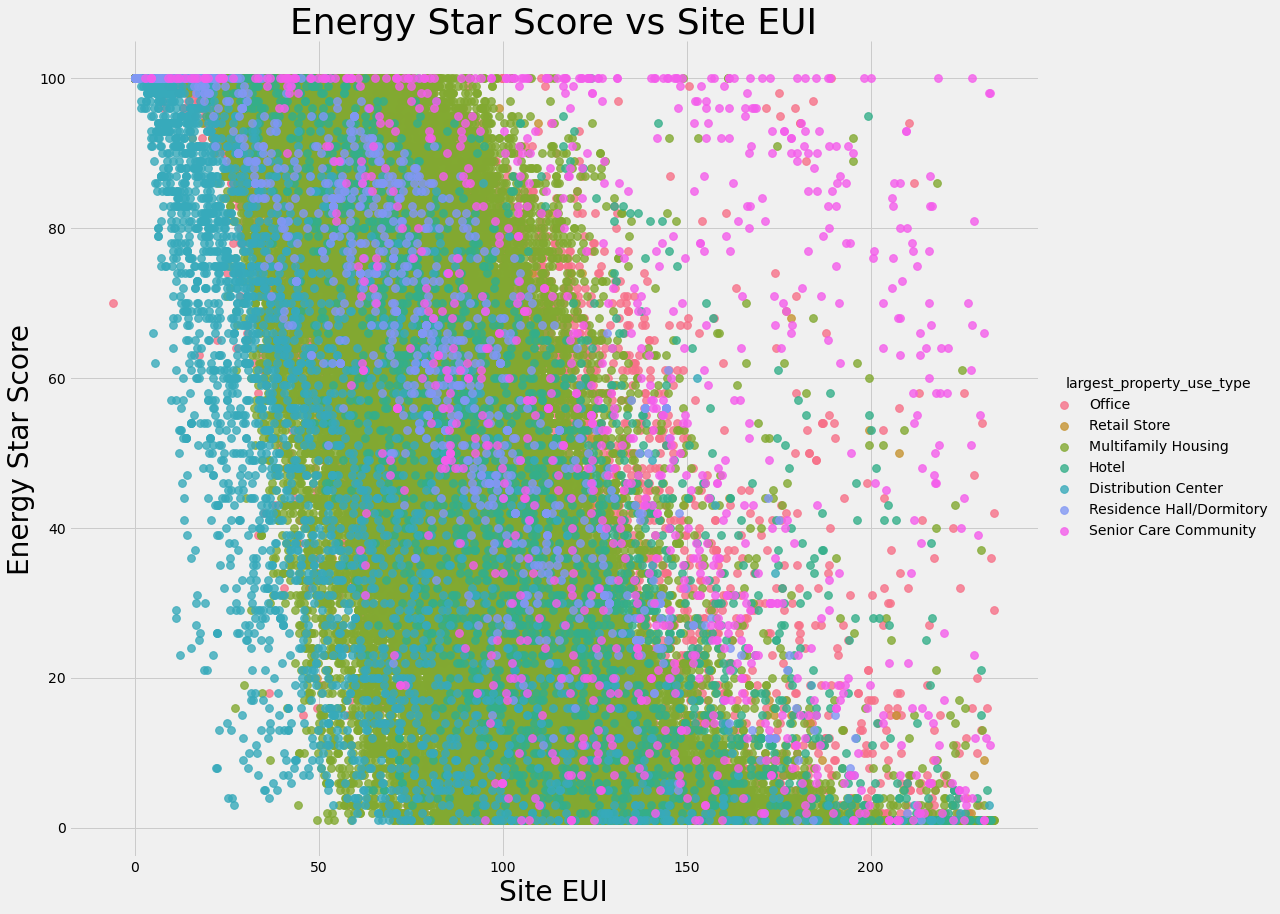

In [ ]:
figsize(12, 10)

# Extract the building types
features['largest_property_use_type'] = data_1.dropna(subset = ['score'])['largest_property_use_type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['largest_property_use_type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('site_eui_kbtu_ft', 'score', 
          hue = 'largest_property_use_type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);


In [ ]:
# Remove any columns with all na values
features_1  = features.dropna(axis=1, how = 'all')
features_1.shape

(127570, 106)

In [ ]:
features_1.columns

Index(['property_id', 'year_built', 'number_of_buildings', 'occupancy',
       'score', 'site_eui_kbtu_ft', 'site_energy_use_kbtu',
       'source_eui_kbtu_ft', 'natural_gas_use_kbtu', 'green_power_offsite_kwh',
       ...
       'largest_property_use_type_Food Service',
       'largest_property_use_type_Hotel',
       'largest_property_use_type_Multifamily Housing',
       'largest_property_use_type_Office', 'largest_property_use_type_Other',
       'largest_property_use_type_Recreation',
       'largest_property_use_type_Residence Hall/Dormitory',
       'largest_property_use_type_Retail Store',
       'largest_property_use_type_Senior Care Community',
       'largest_property_use_type_nan'],
      dtype='object', length=106)

In [ ]:
features_1.drop(['property_id','number_of_buildings','community_board', 'longitude','log_property_id','sqrt_property_id',
 'census_tract','national_median_site_eui','sqrt_number_of_buildings','log_number_of_buildings','sqrt_occupancy','log_occupancy',
'sqrt_community_board', 'log_community_board', 'sqrt_census_tract','log_census_tract', 'sqrt_national_median_site_eui',
       'log_national_median_site_eui'  ], axis=1, inplace=True)


/Users/Lucy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# Extract the buildings with no score and the buildings with a score
no_score = features_1[features_1['score'].isna()]
score = features_1[features_1['score'].notnull()]

print(no_score.shape)
print(score.shape)

(0, 49)
(127570, 49)


In [ ]:
# Separate out the features and targets
features = score.drop(columns=['score'])
targets = score['score']

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127570 entries, 0 to 175781
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   year_built                                          127570 non-null  int64  
 1   occupancy                                           127570 non-null  int64  
 2   site_eui_kbtu_ft                                    127570 non-null  float64
 3   site_energy_use_kbtu                                127570 non-null  float64
 4   green_power_offsite_kwh                             126339 non-null  float64
 5   weather_normalized_site                             101290 non-null  float64
 6   weather_normalized_site_1                           92956 non-null   float64
 7   total_ghg_emissions_metric                          105065 non-null  float64
 8   egrid_output_emissions_rate                         104991 non-n

In [ ]:
# Delete columns containing either 75% or more than 75% NaN Values
perc = 30.0
min_count =  int(((100-perc)/100)*features.shape[0] + 1)
features = features.dropna( axis=1, thresh=min_count)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127570 entries, 0 to 175781
Data columns (total 42 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   year_built                                          127570 non-null  int64  
 1   occupancy                                           127570 non-null  int64  
 2   site_eui_kbtu_ft                                    127570 non-null  float64
 3   site_energy_use_kbtu                                127570 non-null  float64
 4   green_power_offsite_kwh                             126339 non-null  float64
 5   weather_normalized_site                             101290 non-null  float64
 6   weather_normalized_site_1                           92956 non-null   float64
 7   total_ghg_emissions_metric                          105065 non-null  float64
 8   egrid_output_emissions_rate                         104991 non-n

In [ ]:
# fill in nan with mean
for i in features.columns:
    mean_value=features[i].mean()
    features[i].fillna(value=mean_value, inplace=True)

In [ ]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(81644, 42)
(20412, 42)
(25514, 42)
(81644,)
(20412,)
(25514,)


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127570 entries, 0 to 175781
Data columns (total 42 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   year_built                                          127570 non-null  int64  
 1   occupancy                                           127570 non-null  int64  
 2   site_eui_kbtu_ft                                    127570 non-null  float64
 3   site_energy_use_kbtu                                127570 non-null  float64
 4   green_power_offsite_kwh                             127570 non-null  float64
 5   weather_normalized_site                             127570 non-null  float64
 6   weather_normalized_site_1                           127570 non-null  float64
 7   total_ghg_emissions_metric                          127570 non-null  float64
 8   egrid_output_emissions_rate                         127570 non-n

In [ ]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [ ]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 60.00
Baseline Performance on the test set: MAE = 25.9070


In [ ]:
# fit the regressor with val data
regressor = DecisionTreeRegressor() 
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
y_val_pred = regressor.predict(X_val)
#fit test on extracted features 

print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
#print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))

print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
#print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))


MSE train: 0.164, val: 353.978
R^2 train: 1.000, val: 0.614


In [ ]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)[:6]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(5, 7))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")


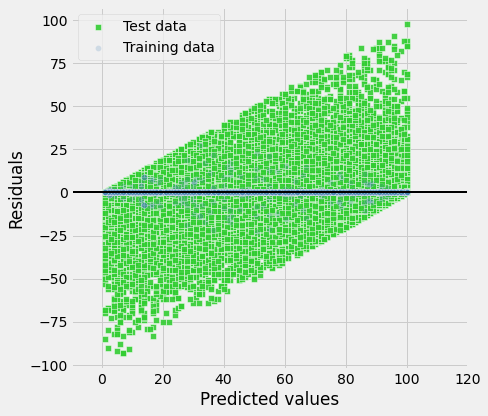

In [ ]:
fig = plt.figure(figsize=(7, 6))

plt.scatter(y_val_pred,  
            y_val_pred - y_val, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.2,
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
plt.xlim([-10, 120])
plt.tight_layout()

#plt.savefig('GBR.png', dpi=300)
plt.show()    

In [ ]:
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
y_train_pred=reg.predict(X_train)
y_val_pred=reg.predict(X_val)
#test
#y_test_pred=reg.predict(X_test)

print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
#print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))

print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))

MSE train: 215.851, val: 222.729
R^2 train: 0.763, val: 0.757


In [ ]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)[:6]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(5, 7))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")


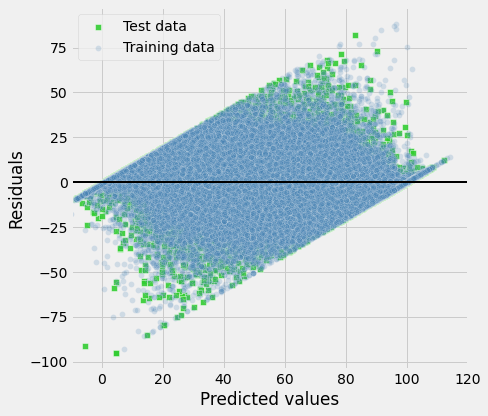

In [ ]:
fig = plt.figure(figsize=(7, 6))

plt.scatter(y_val_pred,  
            y_val_pred - y_val, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.2,
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
plt.xlim([-10, 120])
plt.tight_layout()

#plt.savefig('GBR.png', dpi=300)
plt.show()    